In [1]:
import pandas as pd
import numpy as np

In [2]:
from Screenshot import Screenshot_Clipping
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

In [3]:
from bs4 import BeautifulSoup

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from dateparser import parse

In [6]:
options = Options()
options.headless = True

In [7]:
browser = webdriver.Firefox(options=options,executable_path='/Users/stackzmueller/Downloads/geckodriver')
url = "https://www.google.com/flights#flt=/m/0dclg..2019-11-21*./m/0dclg.2019-11-25;c:USD;e:1;sd:0;t:e"
browser.get(url)

In [8]:
browser.save_screenshot('flight_explorer.png')

True

In [9]:
s = BeautifulSoup(browser.page_source, 'lxml')
base_code = 'uKOpFp4SF2X'
deal_code = 'uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal'
price_code = 'uKOpFp4SF2X__price flt-subhead2'

In [10]:
deal_tags = s.findAll('span', deal_code)
print(deal_tags)

[<span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$29</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$77</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$229</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$107</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$222</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$99</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$55</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$29</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$72</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$143</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$242</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$57</span>, <span class="uKOpFp4SF2X__price flt-subhead2 uKOpFp4SF2X__deal">$232</span>, <span

In [11]:
deals_list = []
for deal in deal_tags:
    cash = str(deal).rfind('$')
    end = str(deal).rfind('<')
    deals_list.append(str(deal)[cash+1:end])
print(deals_list)
    

['29', '77', '229', '107', '222', '99', '55', '29', '72', '143', '242', '57', '232', '223', '116', '284', '346', '256', '127', '57', '137', '173', '176', '232', '169', '85', '238']


In [12]:
other_flights = s.findAll('span', price_code)
print(other_flights)

[<span class="uKOpFp4SF2X__price flt-subhead2">$146</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$222</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$314</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$97</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$165</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$309</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$418</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$378</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$292</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$511</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$376</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$242</span>, <span class="uKOpFp4SF2X__price flt-subhead2">$259</span>]


In [13]:
flight_tags = []

for flight in s.findAll(class_='uKOpFp4SF2X__info-container flt-body2'):
    flight_tags.append(flight)
    
print(*flight_tags[-3:],sep='\n'*2)

<div class="uKOpFp4SF2X__info-container flt-body2"><div class="uKOpFp4SF2X__card-header"><h3 class="flt-subhead1">Palm Springs</h3><div class="uKOpFp4SF2X__dates"><span><span class="uKOpFp4SF2X__medium">Thu, Jan 30 – Thu, Feb 6</span><span class="uKOpFp4SF2X__short">Jan 30–Feb 6</span></span></div><div class="gws-flights__flex-box gws-flights__align-center"><img alt="Frontier" class="uKOpFp4SF2X__airline-logo gws-flights-results__small-logo" height="16" src="//www.gstatic.com/flights/airline_logos/32px/F9.png" title="Frontier" width="16"/><span class="gws-flights__flex-shrink gws-flights__ellipsize">1 stop</span><div class="gws-flights__separator"></div><span class="uKOpFp4SF2X__duration">12h 25m</span></div></div><div class="uKOpFp4SF2X__price-container"><div class="uKOpFp4SF2X__price-row"><span class="uKOpFp4SF2X__price flt-subhead2">$242</span></div></div></div>

<div class="uKOpFp4SF2X__info-container flt-body2"><div class="uKOpFp4SF2X__card-header"><h3 class="flt-subhead1">Tucson<

In [14]:
#Dataframe Builder test
city = flight_tags[-1].find(class_='flt-subhead1').get_text()
dates = flight_tags[-1].find(class_=base_code+'__medium').get_text()
airline = flight_tags[-1].find('img').get('title')
deal_disc = flight_tags[-1].find(class_='uKOpFp4SF2X__deal-description gws-flights__ellipsize flt-caption').get_text()
stops = int(flight_tags[-1].find(class_='gws-flights__flex-shrink gws-flights__ellipsize').get_text().strip('stop'))
duration = flight_tags[-1].find(class_=base_code+'__duration').get_text()

try:
    price = int(flight_tags[-1].find(class_=deal_code).get_text().strip('$'))
    
except:
    price = int(flight_tags[-1].find(class_=price_code).get_text().strip('$'))

if(deal_disc.split()[1]):
    deal_disc = 0 - int(deal_disc.split()[0].strip('$'))
else:
    deal_disc = int(deal_disc.split()[0].strip('$'))

print('City: {}'.format(city))
print('Dates: {}'.format(dates))
print('Airline: {}'.format(airline))
print('Duration: {}'.format(duration))
print('Stops: {}'.format(stops))
print('Deal Desc.: {}'.format(deal_disc))
print('Ticket Price: {}'.format(price))

AttributeError: 'NoneType' object has no attribute 'get_text'

In [67]:
# Soup Tag to Dataframe Algor
frame = []

for flight in flight_tags:
    city = flight.find(class_='flt-subhead1').get_text()
    dates = flight.find(class_=base_code+'__medium').get_text()
    airline = flight.find('img').get('title')
    stop = flight.find(class_='gws-flights__flex-shrink gws-flights__ellipsize').get_text()
    duration = flight.find(class_=base_code+'__duration').get_text()
    
    if(stop.strip()=='Nonstop'):
        stops = 0
    else:
        stops = int(stop.split()[0])
        
    try:
        deal_disc = flight.find(class_='uKOpFp4SF2X__deal-description gws-flights__ellipsize flt-caption').get_text()
        price = int(flight.find(class_=deal_code).get_text().strip('$'))
        splits = dates.split()
        leave_ = ' '.join(splits[:3])
        return_ = ' '.join(splits[-3:])
        
        if(deal_disc.split()[1]):
            deal_disc = int(deal_disc.split()[0].strip('$'))
        else:
            deal_disc = int(deal_disc.split()[0].strip('$'))
            
        if('and' in airline):
            airlines = airline.split('and')
            depart_airline = airlines[0]
            arriv_airline = airlines[1]
        else:
            depart_airline = airline
            arriv_airline = airline
            
    except:
        price = int(flight.find(class_=price_code).get_text().strip('$'))
        
        
    frame.append([city,price,leave_,depart_airline,return_,arriv_airline,duration,stops,deal_disc])

In [68]:
#Dataframe Builder
column_names = ['City','Price','Leave Date','Departing Airlines','Return Date','Returning Airlines','Duration','Stops','Deal Description']
df = pd.DataFrame(frame,columns=column_names)
df

,City,Price,Leave Date,Departing Airlines,Return Date,Returning Airlines,Duration,Stops,Deal Description
0,Orlando,29,"Mon, Jan 27",Frontier,"Wed, Feb 5",Frontier,2h 52m,0,64
1,Las Vegas,77,"Mon, Nov 25",Frontier,"Wed, Dec 4",Frontier,5h 44m,0,110
2,San Diego,229,"Sat, Dec 7",Frontier,"Sat, Dec 14",Frontier,21h 4m,2,147
3,Los Angeles,146,"Sat, Dec 7",Frontier,"Sat, Dec 14",Frontier,6h 23m,1,147
4,Denver,107,"Sun, Nov 17",Frontier,"Mon, Nov 25",Frontier,4h 30m,0,76
5,Phoenix,222,"Sun, Dec 8",Sun Country Airlines,"Sat, Dec 14",Sun Country Airlines,8h 10m,1,127
6,Fort Lauderdale,99,"Sat, Nov 16",American,"Fri, Nov 22",American,2h 45m,0,47
7,New Orleans,55,"Sun, Nov 24",Frontier,"Tue, Dec 3",Frontier,3h 8m,0,120
8,Atlanta,29,"Mon, Feb 3",Frontier,"Mon, Feb 10",Frontier,2h 29m,0,110
9,Tampa,72,"Mon, Nov 18",Frontier,"Tue, Nov 26",Spirit,2h 53m,0,96


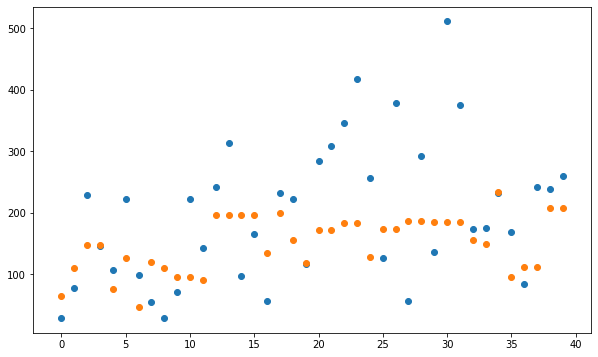

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(df['Price'])),df['Price'])
plt.scatter(np.arange(len(df['Deal Description'])),df['Deal Description'])

In [70]:
df['Price'].describe()

count     40.000000
mean     198.525000
std      113.805725
min       29.000000
25%      105.000000
50%      199.000000
75%      256.750000
max      511.000000
Name: Price, dtype: float64

In [71]:
df['Deal Description'].describe()

count     40.000000
mean     150.200000
std       45.282702
min       47.000000
25%      112.000000
50%      156.000000
75%      185.250000
max      233.000000
Name: Deal Description, dtype: float64

In [72]:
new_df = df.loc[:,['Price', 'Deal Description']]
new_df

,Price,Deal Description
0,29,64
1,77,110
2,229,147
3,146,147
4,107,76
5,222,127
6,99,47
7,55,120
8,29,110
9,72,96


In [73]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [74]:
X = StandardScaler().fit_transform(new_df)
db = DBSCAN(eps=0.5,min_samples=3).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

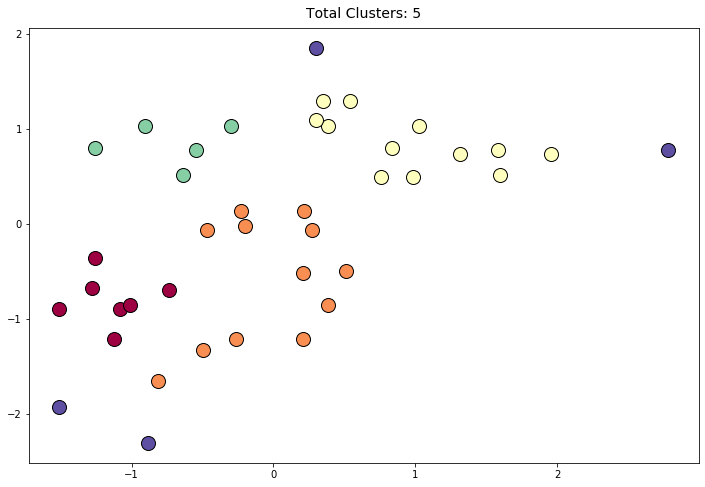

In [75]:
plt.subplots(figsize=(12,8))
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=c, markeredgecolor='k', markersize=14)
    plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)

In [76]:
def test_clusters(frame, eps_value, min_samp, swap_index, swap_value):
    new_df = frame.loc[:,['Price', 'Deal Description']]
    new_df.loc[swap_index]['Price'] = swap_value
    
    X = StandardScaler().fit_transform(new_df)
    db = DBSCAN(eps=eps_value,min_samples=min_samp).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
    
    plt.subplots(figsize=(12,8))
    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=c, markeredgecolor='k', markersize=14)
    plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)

In [77]:
df.loc[25]['Price']

127

In [78]:
df = df.sort_values(by=['Price','Deal Description'])
df

,City,Price,Leave Date,Departing Airlines,Return Date,Returning Airlines,Duration,Stops,Deal Description
0,Orlando,29,"Mon, Jan 27",Frontier,"Wed, Feb 5",Frontier,2h 52m,0,64
8,Atlanta,29,"Mon, Feb 3",Frontier,"Mon, Feb 10",Frontier,2h 29m,0,110
7,New Orleans,55,"Sun, Nov 24",Frontier,"Tue, Dec 3",Frontier,3h 8m,0,120
16,Jacksonville,57,"Sat, Jan 11",Frontier,"Sat, Jan 18",Frontier,2h 36m,0,134
27,Minneapolis,57,"Thu, Dec 5",Sun Country Airlines,"Thu, Dec 12",Sun Country Airlines,2h 57m,0,186
9,Tampa,72,"Mon, Nov 18",Frontier,"Tue, Nov 26",Spirit,2h 53m,0,96
1,Las Vegas,77,"Mon, Nov 25",Frontier,"Wed, Dec 4",Frontier,5h 44m,0,110
36,Raleigh,85,"Mon, Jan 6",Delta,"Wed, Jan 15",Delta,1h 23m,0,112
14,Boston,97,"Mon, Dec 9",Frontier,"Mon, Dec 16",Frontier,1h 26m,0,196
6,Fort Lauderdale,99,"Sat, Nov 16",American,"Fri, Nov 22",American,2h 45m,0,47


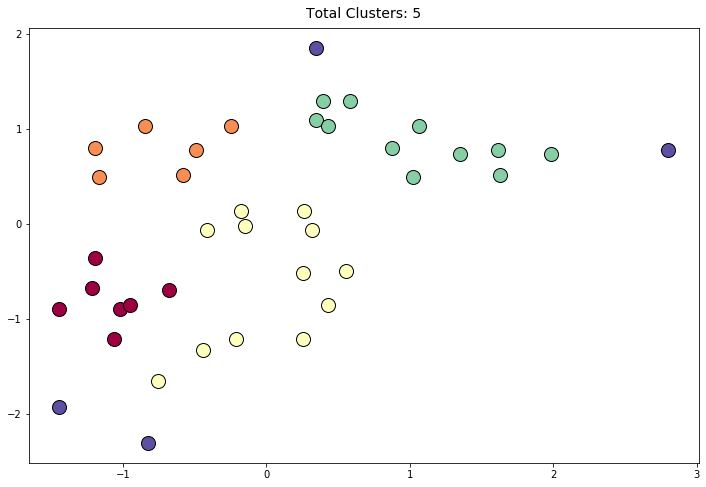

In [79]:
test_clusters(df,0.5,2,20,60)

In [80]:
df = pd.concat([df, pd.DataFrame(db.labels_,columns=['Cluster'])],axis=1)
df.sort_values(by=['Price','Deal Description'])

,City,Price,Leave Date,Departing Airlines,Return Date,Returning Airlines,Duration,Stops,Deal Description,Cluster
0,Orlando,29,"Mon, Jan 27",Frontier,"Wed, Feb 5",Frontier,2h 52m,0,64,-1
8,Atlanta,29,"Mon, Feb 3",Frontier,"Mon, Feb 10",Frontier,2h 29m,0,110,0
7,New Orleans,55,"Sun, Nov 24",Frontier,"Tue, Dec 3",Frontier,3h 8m,0,120,0
16,Jacksonville,57,"Sat, Jan 11",Frontier,"Sat, Jan 18",Frontier,2h 36m,0,134,0
27,Minneapolis,57,"Thu, Dec 5",Sun Country Airlines,"Thu, Dec 12",Sun Country Airlines,2h 57m,0,186,3
9,Tampa,72,"Mon, Nov 18",Frontier,"Tue, Nov 26",Spirit,2h 53m,0,96,0
1,Las Vegas,77,"Mon, Nov 25",Frontier,"Wed, Dec 4",Frontier,5h 44m,0,110,0
36,Raleigh,85,"Mon, Jan 6",Delta,"Wed, Jan 15",Delta,1h 23m,0,112,0
14,Boston,97,"Mon, Dec 9",Frontier,"Mon, Dec 16",Frontier,1h 26m,0,196,3
6,Fort Lauderdale,99,"Sat, Nov 16",American,"Fri, Nov 22",American,2h 45m,0,47,-1


In [81]:
outliers = df[df['Cluster']==0]
outliers

,City,Price,Leave Date,Departing Airlines,Return Date,Returning Airlines,Duration,Stops,Deal Description,Cluster
1,Las Vegas,77,"Mon, Nov 25",Frontier,"Wed, Dec 4",Frontier,5h 44m,0,110,0
7,New Orleans,55,"Sun, Nov 24",Frontier,"Tue, Dec 3",Frontier,3h 8m,0,120,0
8,Atlanta,29,"Mon, Feb 3",Frontier,"Mon, Feb 10",Frontier,2h 29m,0,110,0
9,Tampa,72,"Mon, Nov 18",Frontier,"Tue, Nov 26",Spirit,2h 53m,0,96,0
16,Jacksonville,57,"Sat, Jan 11",Frontier,"Sat, Jan 18",Frontier,2h 36m,0,134,0
19,Myrtle Beach,116,"Thu, Feb 20",Spirit,"Thu, Feb 27",Spirit,1h 41m,0,119,0
36,Raleigh,85,"Mon, Jan 6",Delta,"Wed, Jan 15",Delta,1h 23m,0,112,0


In [82]:
cluster1 = df[df['Cluster']==1]
cluster1

,City,Price,Leave Date,Departing Airlines,Return Date,Returning Airlines,Duration,Stops,Deal Description,Cluster
2,San Diego,229,"Sat, Dec 7",Frontier,"Sat, Dec 14",Frontier,21h 4m,2,147,1
3,Los Angeles,146,"Sat, Dec 7",Frontier,"Sat, Dec 14",Frontier,6h 23m,1,147,1
4,Denver,107,"Sun, Nov 17",Frontier,"Mon, Nov 25",Frontier,4h 30m,0,76,1
5,Phoenix,222,"Sun, Dec 8",Sun Country Airlines,"Sat, Dec 14",Sun Country Airlines,8h 10m,1,127,1
10,Seattle,222,"Mon, Nov 18",Frontier,"Tue, Nov 26",Spirit,11h 5m,1,96,1
11,Chicago,143,"Sun, Feb 16",Spirit,"Tue, Feb 25",United,2h 30m,1,91,1
18,Fresno,223,"Mon, Nov 25",Allegiant,"Wed, Dec 4",Frontier,14h 10m,1,156,1
24,San Jose,256,"Thu, Nov 14",Frontier,"Thu, Nov 21",Frontier,8h 47m,1,128,1
32,Bangor,173,"Sat, Feb 1",American,"Sat, Feb 8",American,1h 38m,0,156,1
33,Sacramento,176,"Thu, Jan 23",American,"Wed, Jan 29",Spirit,8h 4m,1,149,1


In [83]:
cluster2 = df[df['Cluster']==2]
cluster2

,City,Price,Leave Date,Departing Airlines,Return Date,Returning Airlines,Duration,Stops,Deal Description,Cluster
12,Portland,242,"Mon, Dec 9",Frontier,"Mon, Dec 16",Frontier,8h 59m,1,196,2
13,Salt Lake City,314,"Mon, Dec 9",Frontier,"Mon, Dec 16",Frontier,7h 23m,1,196,2
17,Albuquerque,232,"Thu, Dec 5",Frontier,"Thu, Dec 12",Frontier,11h 59m,1,199,2
20,Bozeman,284,"Thu, Dec 5",Delta,"Wed, Dec 11",Frontier,12h 37m,1,172,2
21,Key West,309,"Thu, Dec 5",Delta,"Wed, Dec 11",Frontier,5h 55m,1,172,2
22,Kalispell,346,"Thu, Dec 5",United,"Wed, Dec 11",United,8h 14m,1,183,2
23,Reno,418,"Thu, Dec 5",United,"Wed, Dec 11",United,7h 59m,1,183,2
26,Nassau,378,"Sun, Apr 19",American,"Tue, Apr 28",American,5h 52m,1,173,2
28,Toronto,292,"Thu, Dec 5",Sun Country Airlines,"Thu, Dec 12",Sun Country Airlines,1h 37m,1,186,2
31,Pensacola,376,"Sat, Feb 1",American,"Sat, Feb 8",American,6h 17m,2,185,2


In [84]:
cluster3 = df[df['Cluster']==3]
cluster3

,City,Price,Leave Date,Departing Airlines,Return Date,Returning Airlines,Duration,Stops,Deal Description,Cluster
14,Boston,97,"Mon, Dec 9",Frontier,"Mon, Dec 16",Frontier,1h 26m,0,196,3
15,Houston,165,"Mon, Dec 9",Frontier,"Mon, Dec 16",Frontier,6h 20m,1,196,3
25,Charleston,127,"Sun, Apr 19",American,"Tue, Apr 28",American,2h 12m,0,173,3
27,Minneapolis,57,"Thu, Dec 5",Sun Country Airlines,"Thu, Dec 12",Sun Country Airlines,2h 57m,0,186,3
29,Portland,137,"Sat, Feb 1",American,"Sat, Feb 8",American,1h 26m,0,185,3


In [85]:
clusterMinus = df[df['Cluster']==-1]
clusterMinus

,City,Price,Leave Date,Departing Airlines,Return Date,Returning Airlines,Duration,Stops,Deal Description,Cluster
0,Orlando,29,"Mon, Jan 27",Frontier,"Wed, Feb 5",Frontier,2h 52m,0,64,-1
6,Fort Lauderdale,99,"Sat, Nov 16",American,"Fri, Nov 22",American,2h 45m,0,47,-1
30,Jackson,511,"Sat, Feb 1",American,"Sat, Feb 8",American,10h 31m,2,185,-1
34,Santa Ana,232,"Thu, Dec 5",Frontier,"Thu, Dec 12",Frontier,12h 5m,1,233,-1
